# This is to convert from nmea to Plane Rectangular. Coordinate System by GSI(Geospatial Information Authority of Japan) HP.

# 緯度経度(nmea)から平面直角座標へ国土地理院のHPで変換したい場合

https://vldb.gsi.go.jp/sokuchi/surveycalc/surveycalc/bl2xyf.html

when calculate again,

if you want

%reset

In [ ]:
#if you want
#check current directory
%pwd

In [ ]:
#define working directroy
# %cd C:\\Users\\survey\\Desktop\\nmea20210705
%cd C:\Users\survey\Dropbox\My PC (SURVEY-C20)\Documents\GitHub\GNSS

In [ ]:
#check files
%ls

In [333]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt

# 1. まずは，入力ファイルを設定します.

In [ ]:
# inp_file="2021-07-05_10.nmea"
inp_file="C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC.csv"
# inp_file="2021070509_XY.csv"
# # inp_file="VRS直_2021-07-05-12-48-07.rtk"
# inp_file="VRS直_2021-06-27-11-45-43.rtk"

# base_nameを取得しておきます．
# 出力ファイル名を自動で作成するため

In [ ]:
type(inp_file)
base_name=inp_file.split('.',1)[0]
base_name
# inp_file="VRS直_2021-07-05-12-48-07_get.rtk"

In [ ]:
%pwd

In [ ]:
# make output filename from input file automatically

# out_file="2021-07-05_10_GNRMC_out_test.csv"
# out_file="VRS直_2021-07-05-12-48-07_get.rtk"
# out_file=base_name+"_get.rtk"
out_file=base_name+"_GSI.in"
out_file
# out_file="VRS直_2021-07-05-12-48-07_get.rtk"

## nmeaはUTF-8
## Trimbleはshift_jisなはず

In [ ]:
enc_sty="UTF-8"

# enc_sty="shift_jis"

In [ ]:
# with open("2021-07-05_10.nmea", "r", encoding="UTF-8", errors="", newline="" ) as f:
# with open(inp_file, "r", encoding="UTF-8", errors="", newline="" ) as f:
with open(inp_file, "r", encoding=enc_sty, errors="", newline="" ) as f:
    lst = csv.reader(f, delimiter=",")
    df = pd.DataFrame(lst).rename(columns={0:'ID',1:'time',2:'de',3:'lat',5:'lon',7:'knot',9:'date',12:'mode'})
    # df = pd.DataFrame(lst)

get_id='GNRMC'

In [ ]:
df_gnrmc=df.query('ID in ["$GNRMC"]')
# df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

In [ ]:
df_gnrmc.dtypes

In [ ]:
#中身の確認
df_gnrmc

In [ ]:
pd.options.display.float_format = '{:.7f}'.format

In [ ]:
# df_gnrmc['lat'] == ''] = None

df_gnrmc=df_gnrmc.replace('', np.nan)

In [ ]:
df_gnrmc

In [ ]:
df_gnrmc.dtypes

In [ ]:
df_gnrmc['time']=df_gnrmc['time'].astype(float)

In [ ]:
df_gnrmc

In [ ]:
df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

In [ ]:
df_gnrmc['lon']=df_gnrmc['lon'].astype(float)

In [ ]:
df_gnrmc

In [ ]:
df_gnrmc.dtypes

df_gnrmc['lat']=df_gnrmc['lat']-10

In [ ]:
df_gnrmc

df_gnrmc['lat'] = pd.to_numeric(df_gnrmc['lat'], errors='coerce', downcast='float')
# df_gnrmc['lat']=df_gnrmc['lat'].astype(float)

df_gnrmc['lat'] = pd.to_numeric(df_gnrmc['lat'], errors='coerce', downcast='float')

In [ ]:
df_gnrmc.dtypes

In [ ]:
df_gnrmc_ll=df_gnrmc.filter(items=['lat','lon'])

In [ ]:
df_gnrmc_ll

In [ ]:
df_gnrmc_ll.dtypes

In [ ]:
#これではまだpandasのデータフレーム
df_gnrmc_ll_f=df_gnrmc_ll.astype(float)

In [ ]:
df_gnrmc_ll_f

In [ ]:
type(df_gnrmc_ll_f)

## ↑ここまではPANDA

df_gnrmc_ll['lat']=df_gnrmc_ll['lat'].astype(float)
# df_gnrmc_ll['lon']=df_gnrmc_ll['lon'].astype(float)
# df_gnrmc_ll['lon']=pd.to_numeric(df_gnrmc_ll['lon'])

df_gnrmc_ll

df_gnrmc_ll = df_gnrmc_ll.reset_index(drop=True)
df_gnrmc_ll

In [ ]:
type(df_gnrmc_ll)

## ここで  numpy化する.to_numpyで
## ↑はまだpanda

In [ ]:
# numpy化
df_gnrmc_ll_np=df_gnrmc_ll.to_numpy()

In [ ]:
df_gnrmc_ll_np

In [ ]:
print(df_gnrmc_ll_np[:,0])

In [ ]:
a=divmod(df_gnrmc_ll_np[:,:],100)

In [ ]:
df_gnrmc_ll_np_wa=a[0]+a[1]/60

In [ ]:
df_gnrmc_ll_np_wa


In [ ]:
type(df_gnrmc_ll_np_wa)

In [ ]:
# 度分秒を小数表示する
def decimal(deg,mint,sec):
    deg_int=deg
    mint=mint+sec/60
    deg_dec=mint/60

    deg_all=deg_int+deg_dec
    return deg_all

In [ ]:
x=decimal(137,10,0)
print(x)


下の関数，show_angle(deg)は，下記を参照しました．@sw1227さんありがとうございます．

https://qiita.com/sw1227/items/e7a590994ad7dcd0e8ab
https://nbviewer.jupyter.org/github/nabewari/PRCS2WGS/blob/master/coordinate_transformation.ipynb

In [ ]:
def show_angle(deg):
    """ 小数点の角度[deg]を度,分,秒で表記 """
    d = int(np.floor(deg))
    m = int(np.floor((deg%1) * 60))
    s = ( ((deg%1)*60) % 1 ) * 60
    return """ {0}°{1:02d}'{2}" """.format(d, m, s) # 分は10の位を0埋めする

In [ ]:
df_gnrmc_ll_np_wa.shape

In [ ]:
for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
    print(df_gnrmc_ll_np_wa[i,0])

In [ ]:
for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
    print(df_gnrmc_ll_np_wa[i,1])

In [ ]:
for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    print(i,item)
    # print(i)

In [ ]:
for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # print(i,item)
    j=item
    if(math.isnan(item)==True):
        print('num')
    else:
        print(show_angle(item))
    # show_angle(j)

下の関数，calc_xyは，下記を参照しました．@sw1227さんありがとうございます．

https://qiita.com/sw1227/items/e7a590994ad7dcd0e8ab
https://nbviewer.jupyter.org/github/nabewari/PRCS2WGS/blob/master/coordinate_transformation.ipynb

## 3. 実装（緯度経度 -> 平面直角座標の関数）
### 3.1. 緯度経度 -> 平面直角座標の関数

In [ ]:
def calc_xy(phi_deg, lambda_deg, phi0_deg, lambda0_deg):
    """ 緯度経度を平面直角座標に変換する
    - input:
        (phi_deg, lambda_deg): 変換したい緯度・経度[度]（分・秒でなく小数であることに注意）
        (phi0_deg, lambda0_deg): 平面直角座標系原点の緯度・経度[度]（分・秒でなく小数であることに注意） 	7系　北緯=36度0分0秒 東経=137度10分0秒
    - output:
        x: 変換後の平面直角座標[m]
        y: 変換後の平面直角座標[m]
    """
    # 緯度経度・平面直角座標系原点をラジアンに直す
    phi_rad = np.deg2rad(phi_deg)
    lambda_rad = np.deg2rad(lambda_deg)
    phi0_rad = np.deg2rad(phi0_deg)
    lambda0_rad = np.deg2rad(lambda0_deg)

    # 補助関数
    def A_array(n):
        A0 = 1 + (n**2)/4. + (n**4)/64.
        A1 = -     (3./2)*( n - (n**3)/8. - (n**5)/64. )
        A2 =     (15./16)*( n**2 - (n**4)/4. )
        A3 = -   (35./48)*( n**3 - (5./16)*(n**5) )
        A4 =   (315./512)*( n**4 )
        A5 = -(693./1280)*( n**5 )
        return np.array([A0, A1, A2, A3, A4, A5])

    def alpha_array(n):
        a0 = np.nan # dummy
        a1 = (1./2)*n - (2./3)*(n**2) + (5./16)*(n**3) + (41./180)*(n**4) - (127./288)*(n**5)
        a2 = (13./48)*(n**2) - (3./5)*(n**3) + (557./1440)*(n**4) + (281./630)*(n**5)
        a3 = (61./240)*(n**3) - (103./140)*(n**4) + (15061./26880)*(n**5)
        a4 = (49561./161280)*(n**4) - (179./168)*(n**5)
        a5 = (34729./80640)*(n**5)
        return np.array([a0, a1, a2, a3, a4, a5])

    # 定数 (a, F: 世界測地系-測地基準系1980（GRS80）楕円体)
    m0 = 0.9999
    a = 6378137.
    F = 298.257222101

    # (1) n, A_i, alpha_iの計算
    n = 1. / (2*F - 1)
    A_array = A_array(n)
    alpha_array = alpha_array(n)

    # (2), S, Aの計算
    A_ = ( (m0*a)/(1.+n) )*A_array[0] # [m]
    S_ = ( (m0*a)/(1.+n) )*( A_array[0]*phi0_rad + np.dot(A_array[1:], np.sin(2*phi0_rad*np.arange(1,6))) ) # [m]

    # (3) lambda_c, lambda_sの計算
    lambda_c = np.cos(lambda_rad - lambda0_rad)
    lambda_s = np.sin(lambda_rad - lambda0_rad)

    # (4) t, t_の計算
    t = np.sinh( np.arctanh(np.sin(phi_rad)) - ((2*np.sqrt(n)) / (1+n))*np.arctanh(((2*np.sqrt(n)) / (1+n)) * np.sin(phi_rad)) )
    t_ = np.sqrt(1 + t*t)

    # (5) xi', eta'の計算
    xi2  = np.arctan(t / lambda_c) # [rad]
    eta2 = np.arctanh(lambda_s / t_)

    # (6) x, yの計算
    x = A_ * (xi2 + np.sum(np.multiply(alpha_array[1:],
                                       np.multiply(np.sin(2*xi2*np.arange(1,6)),
                                                   np.cosh(2*eta2*np.arange(1,6)))))) - S_ # [m]
    y = A_ * (eta2 + np.sum(np.multiply(alpha_array[1:],
                                        np.multiply(np.cos(2*xi2*np.arange(1,6)),
                                                    np.sinh(2*eta2*np.arange(1,6)))))) # [m]
    # return
    return x, y # [m]

In [ ]:
#　空のnumpy配列
latlon=np.empty((df_gnrmc_ll_np_wa.shape[0],2))
print(latlon)

In [ ]:
for i in range(0,df_gnrmc_ll_np_wa.shape[0]):
#     print(df_gnrmc_ll_np_wa[i,1])
# for i, item in np.ndenumerate(df_gnrmc_ll_np_wa[:,0]):
    # print(i,item)
    # j=item
    if(math.isnan(item)==True):
        print('nan')
    else:
        # print(show_angle(item))
        x, y = calc_xy(df_gnrmc_ll_np_wa[i,0], df_gnrmc_ll_np_wa[i,1], 36., 137+10./60)
        latlon[i,0]=x
        latlon[i,1]=y
        print("x, y = ({0}, {1})".format(x, y))
    # show_angle(j)

In [ ]:
latlon

In [ ]:
df_xy=pd.DataFrame(latlon)

In [ ]:
df_xy

In [ ]:
df_xy = df_xy.rename(columns={0:'X',1:'Y'})

In [ ]:
df_xy

In [ ]:
df_gnrmc

In [ ]:
# df_gnrmc_xy=pd.merge(df_gnrmc,df_xy)
df_gnrmc_xy=pd.concat([df_gnrmc,df_xy], axis=1)

#axis=1 横方向接続
#axis=0 縦方向接続

In [314]:
df_gnrmc_xy_dist=df_gnrmc_xy

In [315]:
df_gnrmc_xy_dist

,ID,time,de,lat,4,lon,6,knot,8,date,...,42,43,44,45,46,47,48,49,X,Y
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587


In [317]:
df_gnrmc_xy_dist=df_gnrmc_xy_dist.assign(dist=np.nan)

In [378]:
df_gnrmc_xy_dist

,ID,time,de,lat,4,lon,6,knot,8,date,...,43,44,45,46,47,48,49,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587,90682.4432779


In [396]:
df_gnrmc_xy_dist_rm=df_gnrmc_xy_dist[['ID','time','de','lat',4,'lon',6,'knot','date','mode',13,'X','Y','dist']]

In [394]:
df_gnrmc_xy_dist_rm

,ID,times,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,0.0000000,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,0.0000000,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,0.0000000,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,0.0000000,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,0.0000000,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,0.0000000,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,0.0000000,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,0.0000000,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,0.0000000,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,90682.4432779


In [395]:
df_gnrmc_xy_dist_rm_times=df_gnrmc_xy_dist_rm

In [393]:
df_gnrmc_xy_dist_rm_times.insert(2,"times",0.0)

ValueError: cannot insert times, already exists

In [391]:
df_gnrmc_xy_dist_rm_times

,ID,times,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
0,$GNRMC,0.0000000,145.0000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*18,NaN,NaN,NaN
1,$GNRMC,0.0000000,145.1200000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1B,NaN,NaN,NaN
2,$GNRMC,0.0000000,145.2500000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1F,NaN,NaN,NaN
3,$GNRMC,0.0000000,145.3700000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1C,NaN,NaN,NaN
4,$GNRMC,0.0000000,145.5000000,V,NaN,NaN,NaN,NaN,NaN,050721,N,V*1D,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,0.0000000,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,050721,R,V*09,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,0.0000000,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,050721,R,V*0E,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,0.0000000,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,050721,R,V*08,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,0.0000000,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,050721,R,V*0D,-90576.3749537,-4384.7256587,90682.4432779


In [321]:
df_gnrmc_xy_dist.dtypes

ID       object
time    float64
de       object
lat     float64
4        object
lon     float64
6        object
knot     object
8        object
date     object
10      float64
11      float64
mode     object
13       object
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
X       float64
Y       float64
dist    float64
dtype: object

In [322]:
df_gnrmc_xy_dist['dist']=np.sqrt(df_gnrmc_xy_dist['X']**2+df_gnrmc_xy_dist['Y']**2)

In [330]:
df_gnrmc_xy_dist

,ID,time,de,lat,4,lon,6,knot,8,date,...,43,44,45,46,47,48,49,X,Y,dist
0,$GNRMC,145.0000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,$GNRMC,145.1200000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,$GNRMC,145.2500000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GNRMC,145.3700000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,$GNRMC,145.5000000,V,NaN,NaN,NaN,NaN,NaN,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30714,$GNRMC,10834.3800000,A,3511.0129030,N,13707.1113436,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3768017,-4384.7274811,90682.4452119
30715,$GNRMC,10834.5000000,A,3511.0129025,N,13707.1113439,E,0.024,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3777264,-4384.7270262,90682.4461135
30716,$GNRMC,10834.6300000,A,3511.0129041,N,13707.1113448,E,0.015,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3747688,-4384.7256586,90682.4430933
30717,$GNRMC,10834.7500000,A,3511.0129040,N,13707.1113448,E,0.025,NaN,050721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90576.3749537,-4384.7256587,90682.4432779


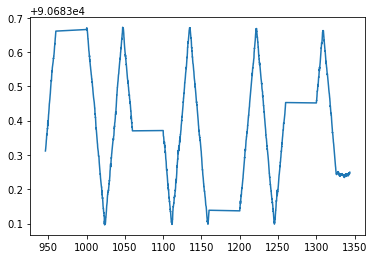

In [359]:
%matplotlib inline
time=df_gnrmc_xy_dist.loc[3750:5600,'time']
dist=df_gnrmc_xy_dist.loc[3750:5600,'dist']
plt.plot(time,dist)

In [360]:
df_gnrmc_xy_dist_first=df_gnrmc_xy_dist[3750:5600]

In [365]:
df_gnrmc_xy_dist_first
df_gnrmc_xy_dist_first.to_csv('C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC_first.csv')

In [369]:
df_gnrmc_xy_dist_first_rm=df_gnrmc_xy_dist_first[['ID','time','de','lat',4,'lon',6,'knot','date','mode',13,'X','Y','dist']]

In [370]:
df_gnrmc_xy_dist_first_rm

,ID,time,de,lat,4,lon,6,knot,date,mode,13,X,Y,dist
3750,$GNRMC,946.2500000,A,3511.0124719,N,13707.1103771,E,0.099,050721,R,V*04,-90577.1731439,-4386.1949297,90683.3115887
3751,$GNRMC,946.3800000,A,3511.0124698,N,13707.1103753,E,0.075,050721,R,V*02,-90577.1770252,-4386.1976638,90683.3155977
3752,$GNRMC,946.5000000,A,3511.0124684,N,13707.1103777,E,0.038,050721,R,V*0E,-90577.1796154,-4386.1940220,90683.3180088
3753,$GNRMC,946.6300000,A,3511.0124679,N,13707.1103787,E,0.079,050721,R,V*06,-90577.1805406,-4386.1925046,90683.3188595
3754,$GNRMC,946.7500000,A,3511.0124664,N,13707.1103790,E,0.047,050721,R,V*06,-90577.1833141,-4386.1920505,90683.3216078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,$GNRMC,1343.0000000,A,3511.0125071,N,13707.1103622,E,0.033,050721,R,V*02,-90577.1080523,-4386.2175150,90683.2476658
5596,$GNRMC,1343.1300000,A,3511.0125066,N,13707.1103615,E,0.017,050721,R,V*04,-90577.1089762,-4386.2185780,90683.2486400
5597,$GNRMC,1343.2500000,A,3511.0125088,N,13707.1103636,E,0.026,050721,R,V*02,-90577.1049102,-4386.2153884,90683.2444245
5598,$GNRMC,1343.3800000,A,3511.0125076,N,13707.1103614,E,0.057,050721,R,V*09,-90577.1071273,-4386.2187289,90683.2468005


df_gnrmc_xy_dist.drop(df_gnrmc_xy_dist.columns[[41,42,45,46,47]], axis=1)

## 同期処理後半スタート


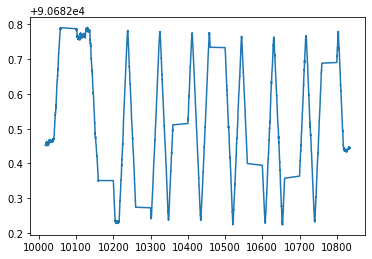

In [381]:
%matplotlib inline
time=df_gnrmc_xy_dist_rm.loc[26900:30718,'time']
dist=df_gnrmc_xy_dist_rm.loc[26900:30718,'dist']
plt.plot(time,dist)

In [383]:
# ここで「行レベル」で抽出しよう．
df_gnrmc_xy_dist_rm_last=df_gnrmc_xy_dist_rm[26900:30718]
df_gnrmc_xy_dist_rm_last
df_gnrmc_xy_dist_rm_last.to_csv('C:\\Users\survey\Desktop\\nmea20210705\\2021-07-05_09+10_GNRMC_last.csv')

### 3.2. テスト
- [国土地理院の換算サービス](http://vldb.gsi.go.jp/sokuchi/surveycalc/surveycalc/bl2xyf.html)と比較

In [ ]:
x, y = calc_xy(df_gnrmc_ll_np_wa[:,0], df_gnrmc_ll_np_wa[:,1], 36., 137+10./60)
# print "x, y = ({0}, {1})".format(x, y)

In [ ]:
x, y = calc_xy(36.103774791666666, 140.08785504166664, 36., 139+50./60)
print "x, y = ({0}, {1})".format(x, y)
